# II. Исследовательский анализ данных (EDA)

**Цель ноутбука:**

- загрузить очищенные данные,
- провести исследовательский анализ,
- выявить закономерности,
- проверить и визуализировать распределения,
- сегментировать пользователей,
- рассчитать базовые метрики.

### Импорт библиотек и загрузка очищенных данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

sns.set_theme(style="darkgrid", palette="deep")

In [2]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
pd.set_option('display.precision', 3)

In [3]:
df = pd.read_parquet("../data/cleaned/kicksharing_clean.parquet")

# быстрый просмотр
print(f"Размер очищенного датасета: {df.shape}\n")
print(df.info())

Размер очищенного датасета: (352282, 27)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352282 entries, 0 to 352281
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   order_rk                 352282 non-null  int64         
 1   party_rk                 352282 non-null  int64         
 2   gender_cd                352282 non-null  category      
 3   age                      352282 non-null  int8          
 4   education_level_cd       352282 non-null  category      
 5   marital_status_cd        352282 non-null  category      
 6   lvn_state_nm             352282 non-null  category      
 7   minute_cost              352282 non-null  float32       
 8   activation_cost          352282 non-null  float32       
 9   hold_amount              352282 non-null  float32       
 10  transport_model          352282 non-null  category      
 11  distance_km              352282 non-

In [4]:
df.head()

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,transport_model,distance_km,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt,trip_duration_min,avg_speed_kmh,cashback_rate_rub,cashback_rate_bns,hour,day_of_week,month
0,252614779,517007040,M,26,GRD,UNM,Г МОСКВА,7.99,50.0,300.0,SL,0.806,2024-04-17 16:45:16,2024-04-17 16:45:20.641980,2024-04-17 16:51:26.403392,3,2024-04-17 16:45:20.641980,97.94,0.0,0.0,6.096,7.930,0.000,0.0,16,2,4
1,252613066,297828357,M,31,Unknown,UNM,ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА АО,7.99,50.0,300.0,SL,0.238,2024-04-22 15:46:04,2024-04-22 15:46:10.062458,2024-04-22 15:55:04.011996,3,2024-04-22 15:46:10.062458,121.91,1.0,0.0,8.899,1.604,0.008,0.0,15,0,4
2,252621809,145875613,M,35,GRD,DIV,Г МОСКВА,7.99,50.0,300.0,SL,0.282,2024-04-22 15:46:53,2024-04-22 15:47:00.283797,2024-04-22 15:56:28.643724,3,2024-04-22 15:47:00.283797,129.90,1.0,0.0,9.473,1.787,0.008,0.0,15,0,4
3,252632392,328153536,M,25,Unknown,Unknown,Г САНКТ-ПЕТЕРБУРГ,6.99,30.0,300.0,SL,0.303,2024-04-23 06:53:41,2024-04-23 06:53:45.475088,2024-04-23 06:56:59.051051,3,2024-04-23 06:53:45.475088,57.96,0.0,0.0,3.226,5.638,0.000,0.0,6,1,4
4,252633271,517007040,M,26,GRD,UNM,Г МОСКВА,7.49,50.0,300.0,SL,0.823,2024-04-23 09:46:17,2024-04-23 09:46:22.008459,2024-04-23 09:50:38.041837,3,2024-04-23 09:46:22.008459,87.45,0.0,0.0,4.267,11.569,0.000,0.0,9,1,4


### Базовые метрики и статистики

In [5]:
# описательная статистика по числовым столбцам
df.describe().T

,count,mean,min,25%,50%,75%,max,std
order_rk,352282.0,288802148.144,252611203.0,261319840.5,270153536.5,343265936.5,356252786.0,38079549.234
party_rk,352282.0,596039931.071,14717.0,293655286.0,610101606.0,863578022.75,1301075452.0,330768096.469
age,352282.0,31.544,12.0,24.0,31.0,37.0,94.0,9.413
minute_cost,352282.0,7.288,4.49,6.49,7.49,8.23,19.99,1.291
activation_cost,352282.0,42.611,0.0,30.0,50.0,50.0,50.0,12.026
hold_amount,352282.0,300.0,300.0,300.0,300.0,300.0,300.0,0.0
distance_km,352282.0,2.5,0.1,1.067,1.803,3.078,47.901,2.433
created_dttm,352282,2024-08-18 08:52:09.158688,2024-04-17 16:45:16,2024-07-20 17:09:30.249999872,2024-08-22 18:12:24.500000,2024-09-16 06:08:44.750000128,2024-10-21 17:18:04,NaN
book_start_dttm,352282,2024-08-18 08:52:15.294279936,2024-04-17 16:45:20.641980,2024-07-20 17:09:33.063914496,2024-08-22 18:12:29.536022528,2024-09-16 06:08:48.777500160,2024-10-21 17:18:07.715000,NaN
book_end_dttm,352282,2024-08-18 09:03:56.482313728,2024-04-17 16:51:26.403392,2024-07-20 17:25:51.515852800,2024-08-22 18:25:30.241025024,2024-09-16 06:19:07.024210176,2024-10-21 17:23:06.640943,NaN


In [6]:
# уникальных пользователей
unique_users = df['party_rk'].nunique()

print(f"Уникальных пользователей: {unique_users}")

Уникальных пользователей: 57170


Есть постоянные пользователи сервиса.

In [7]:
metrics = {
    'avg_price': df['nominal_price_rub_amt'].mean(),
    'median_price': df['nominal_price_rub_amt'].median(),
    'avg_trip_duration': df['trip_duration_min'].mean(),
    'median_trip_duration': df['trip_duration_min'].median(),
    'avg_distance_km': df['distance_km'].mean(),
    'median_distance_km': df['distance_km'].median(),
}

for key, value in metrics.items():
    print(f"{key}: {value}")

avg_price: 130.05142211914062
median_price: 105.93000030517578
avg_trip_duration: 11.686468124389648
median_trip_duration: 8.140203475952148
avg_distance_km: 2.5002617835998535
median_distance_km: 1.802819013595581


- _Средний чек за поездку:_ 130.05 руб.
- _Средняя длительность поездки:_ 11.69 мин.
- _Средняя дистанция поездки:_ 2.5 км.

### Распределение количественных признаков

In [8]:
# создадим датасет, в котором оставим только уникальные идентификаторы пользователей
user_df = df.drop_duplicates(subset='party_rk').reset_index(drop=True)
user_df.head()

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,transport_model,distance_km,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt,trip_duration_min,avg_speed_kmh,cashback_rate_rub,cashback_rate_bns,hour,day_of_week,month
0,252614779,517007040,M,26,GRD,UNM,Г МОСКВА,7.99,50.0,300.0,SL,0.806,2024-04-17 16:45:16,2024-04-17 16:45:20.641980,2024-04-17 16:51:26.403392,3,2024-04-17 16:45:20.641980,97.94,0.0,0.0,6.096,7.930,0.000,0.0,16,2,4
1,252613066,297828357,M,31,Unknown,UNM,ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА АО,7.99,50.0,300.0,SL,0.238,2024-04-22 15:46:04,2024-04-22 15:46:10.062458,2024-04-22 15:55:04.011996,3,2024-04-22 15:46:10.062458,121.91,1.0,0.0,8.899,1.604,0.008,0.0,15,0,4
2,252621809,145875613,M,35,GRD,DIV,Г МОСКВА,7.99,50.0,300.0,SL,0.282,2024-04-22 15:46:53,2024-04-22 15:47:00.283797,2024-04-22 15:56:28.643724,3,2024-04-22 15:47:00.283797,129.90,1.0,0.0,9.473,1.787,0.008,0.0,15,0,4
3,252632392,328153536,M,25,Unknown,Unknown,Г САНКТ-ПЕТЕРБУРГ,6.99,30.0,300.0,SL,0.303,2024-04-23 06:53:41,2024-04-23 06:53:45.475088,2024-04-23 06:56:59.051051,3,2024-04-23 06:53:45.475088,57.96,0.0,0.0,3.226,5.638,0.000,0.0,6,1,4
4,252629884,785676171,M,22,Unknown,Unknown,Unknown,7.99,30.0,300.0,SL,0.516,2024-04-23 15:53:04,2024-04-23 15:53:11.196472,2024-04-23 15:55:50.660592,3,2024-04-23 15:53:11.196472,53.97,2.0,0.0,2.658,11.653,0.037,0.0,15,1,4


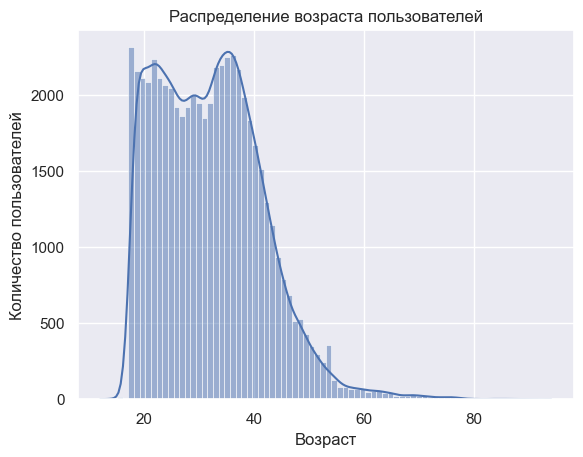

In [9]:
sns.histplot(user_df['age'], bins=80, kde=True)
plt.title('Распределение возраста пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.show()

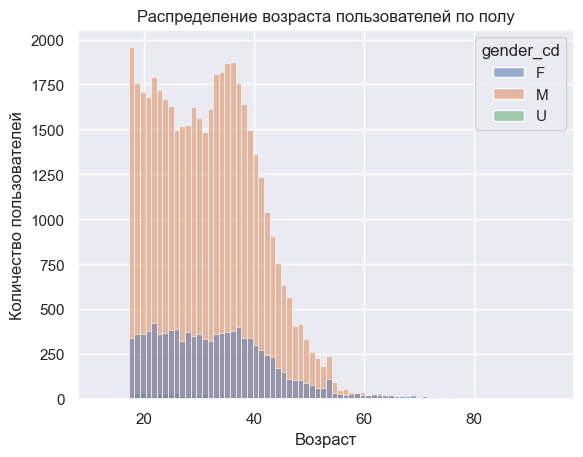

In [10]:
sns.histplot(data=user_df, x='age', hue='gender_cd', bins=80, multiple='layer')
plt.title('Распределение возраста пользователей по полу')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.show()

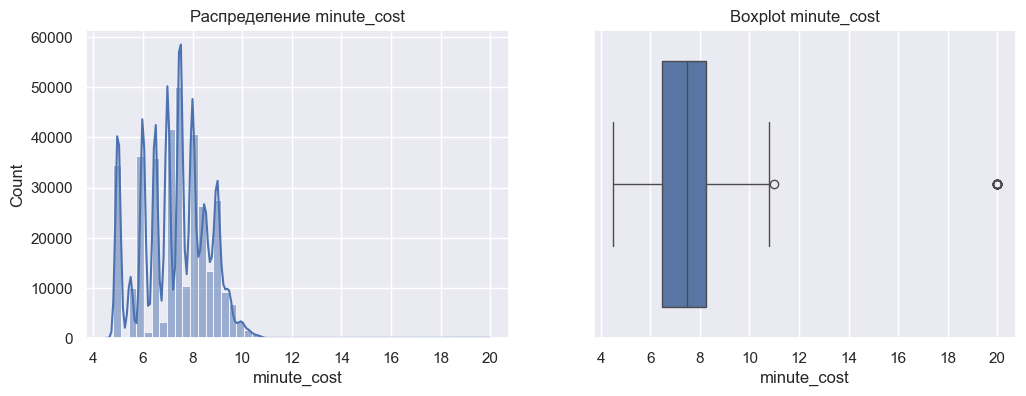

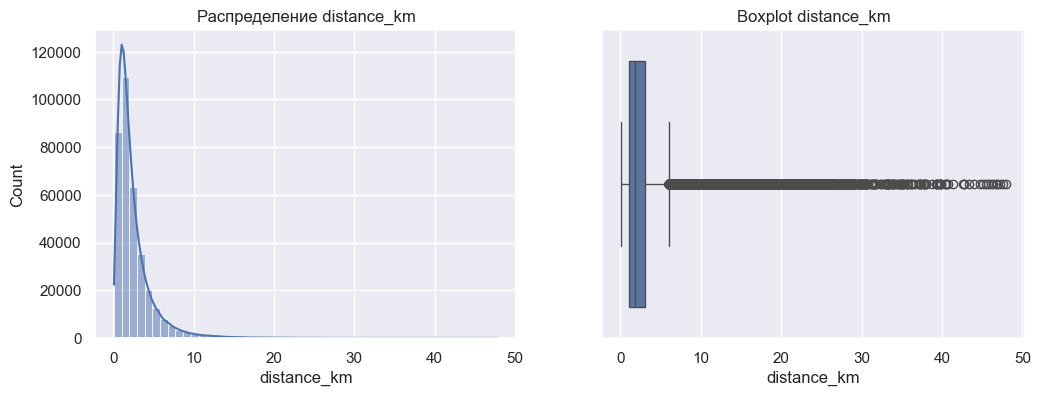

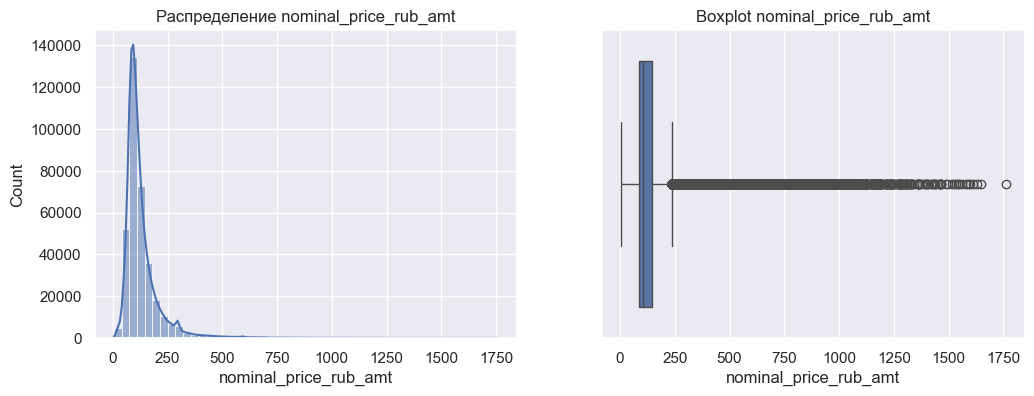

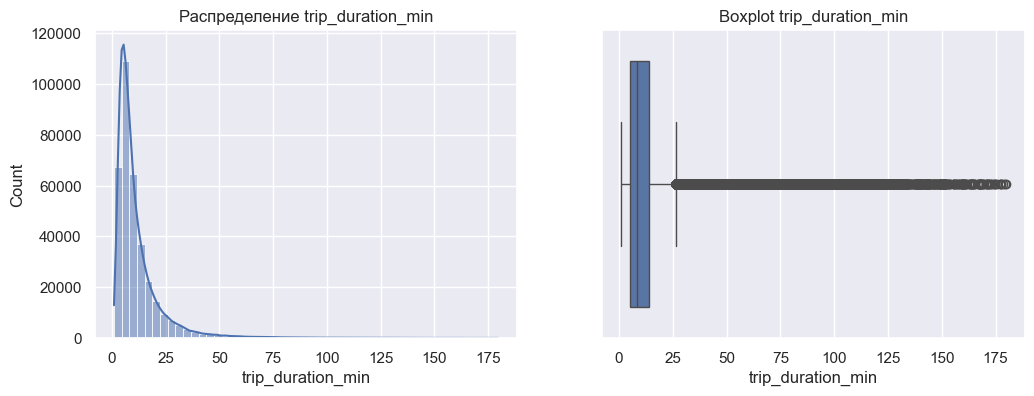

In [11]:
# распределение количественных признаков поездок

columns = ['minute_cost', 'distance_km', 'nominal_price_rub_amt', 'trip_duration_min']

for col in columns:
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f"Распределение {col}")

    plt.subplot(1, 2, 2)
    sns.boxplot(x = df[col])
    plt.title(f"Boxplot {col}")

    plt.show()

In [12]:
# метрики количественных признаков

metrics = {
    'avg_age': user_df['age'].mean(),
    'median_age': user_df['age'].median(),
    'avg_minute_cost': df['minute_cost'].mean(),
    'median_minute_cost': df['minute_cost'].median(),
    'avg_distance_km': df['distance_km'].mean(),
    'median_distance_km': df['distance_km'].median(),
    'avg_price': df['nominal_price_rub_amt'].mean(),
    'median_price': df['nominal_price_rub_amt'].median(),
    'avg_trip_duration': df['trip_duration_min'].mean(),
    'median_trip_duration': df['trip_duration_min'].median()
}

for key, value in metrics.items():
    print(f"{key}: {value}")

avg_age: 31.962620255378695
median_age: 31.0
avg_minute_cost: 7.288156986236572
median_minute_cost: 7.489999771118164
avg_distance_km: 2.5002617835998535
median_distance_km: 1.802819013595581
avg_price: 130.05142211914062
median_price: 105.93000030517578
avg_trip_duration: 11.686468124389648
median_trip_duration: 8.140203475952148


**Анализ распределений:**

1. _Активные пользователи сервиса_ — мужчины от 18 до 40 лет.
2. _Средний возраст пользователей:_ 32 года.
3. _Средняя стоимость минуты поездки:_ 7.3 рубля.

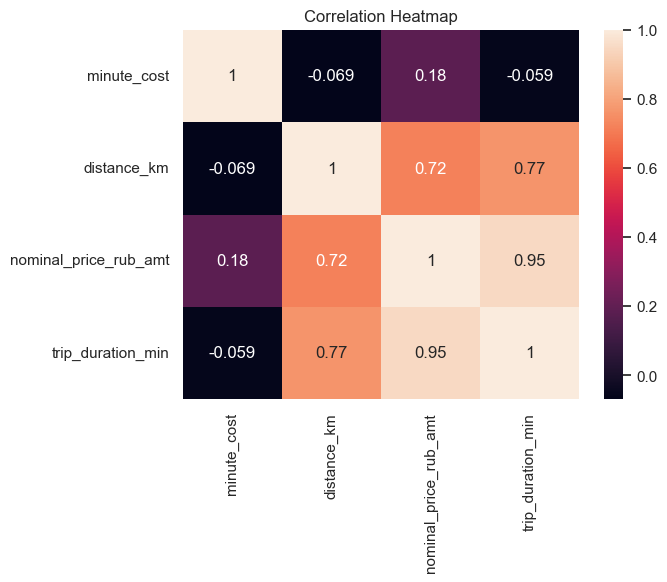

In [13]:
# матрица корреляции признаков
sns.heatmap(df[columns].corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

- Длительность поездки (`trip_duration_min`) и стоимость поездки (`nominal_price_rub_amt`) имеют очень сильную связь (0.95). Обусловлено естественной зависимостью: чем дольше поездка, тем больше стоимость поездки.
- Дистанция (`distance_km`) и длительность (`trip_duration_min`) связаны (0.77), что отражает естественную зависимость: чем дольше поездка, тем больше расстояние.
- Дистанция (`distance_km`) и стоимость поездки (`nominal_price_rub_amt`) также положительно связаны (0.72) — клиенты, проезжающие больше километров, платят больше.

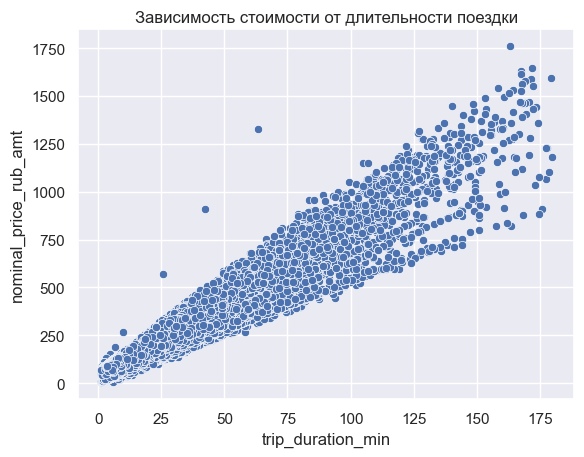

In [14]:
# корреляция стоимости и длительности поездки

sns.scatterplot(data=df, x='trip_duration_min', y='nominal_price_rub_amt')
plt.title('Зависимость стоимости от длительности поездки')
plt.show()

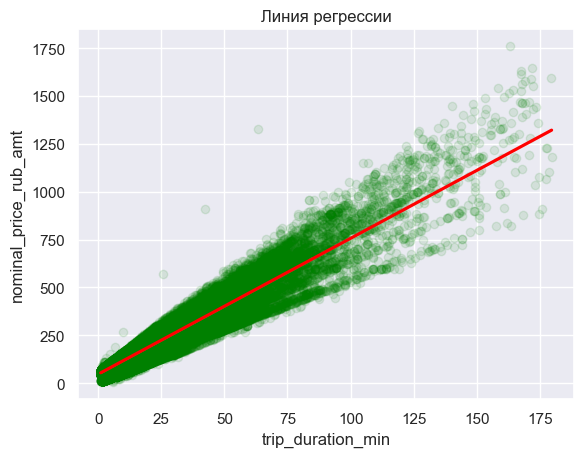

In [15]:
sns.regplot(data=df, x='trip_duration_min', y='nominal_price_rub_amt',
            scatter_kws={'color': 'green', 'alpha': 0.1}, line_kws={'color': 'red'})
plt.title("Линия регрессии")
plt.show()

### Распределение временных признаков

Исследуем активность пользователей во времени:
- пиковые часы в течение дня;
- в какие дни недели поездки наиболее популярны;
- как распределены поездки по месяцам (сезонность);
- одинаковое ли поведение пользователей в будние и выходные дни.

In [16]:
df['dow_name'] = df['local_book_start_dttm'].dt.day_name().astype('category')

df['month_name'] = df['local_book_start_dttm'].dt.month_name().astype('category')

df.sample(5, random_state=42)

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,transport_model,distance_km,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt,trip_duration_min,avg_speed_kmh,cashback_rate_rub,cashback_rate_bns,hour,day_of_week,month,dow_name,month_name
51741,257358009,1167751639,M,34,Unknown,Unknown,Г САНКТ-ПЕТЕРБУРГ,6.49,0.0,300.0,SL,0.923,2024-07-05 10:09:08,2024-07-05 10:09:20.121203,2024-07-05 10:14:20.589391,3,2024-07-05 10:09:20.121203,32.45,4.87,0.0,5.008,11.060,0.15,0.000,10,4,7,Friday,July
207200,272728321,758629778,M,23,Unknown,Unknown,Г МОСКВА,6.99,50.0,300.0,Max,4.628,2024-08-31 04:22:53,2024-08-31 04:22:56.311110,2024-08-31 04:32:14.453935,3,2024-08-31 04:22:56.311110,119.90,11.99,0.0,9.302,29.852,0.10,0.000,4,5,8,Saturday,August
48498,257073432,267153714,M,46,Unknown,Unknown,ИВАНОВСКАЯ ОБЛ,4.99,50.0,300.0,E,1.205,2024-07-04 04:53:33,2024-07-04 04:53:37.115209,2024-07-04 05:00:32.461108,3,2024-07-04 04:53:37.115209,84.93,8.49,0.0,6.922,10.442,0.10,0.000,4,3,7,Thursday,July
240950,275215009,276109652,M,28,SCH,UNM,Г САНКТ-ПЕТЕРБУРГ,7.49,50.0,300.0,SL,5.454,2024-09-09 20:48:20,2024-09-09 20:48:22.698000,2024-09-09 21:01:32.016537,3,2024-09-09 20:48:22.698000,154.86,0.00,66.0,13.155,24.874,0.00,0.426,20,0,9,Monday,September
118284,264796833,164507074,M,27,Unknown,Unknown,НОВОСИБИРСКАЯ ОБЛ,5.99,30.0,300.0,E,3.824,2024-08-02 15:35:41,2024-08-02 15:35:44.554400,2024-08-02 15:50:02.479468,7,2024-08-02 19:35:44.554400,119.85,73.11,0.0,14.299,16.046,0.61,0.000,19,4,8,Friday,August


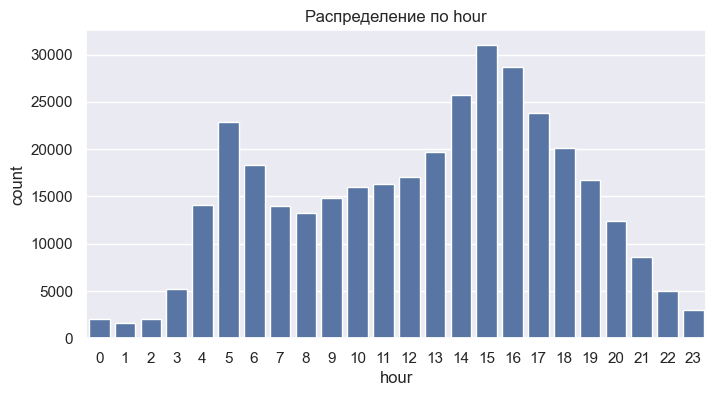

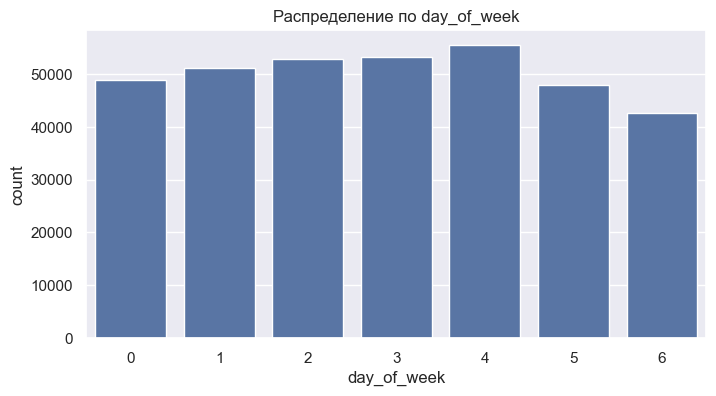

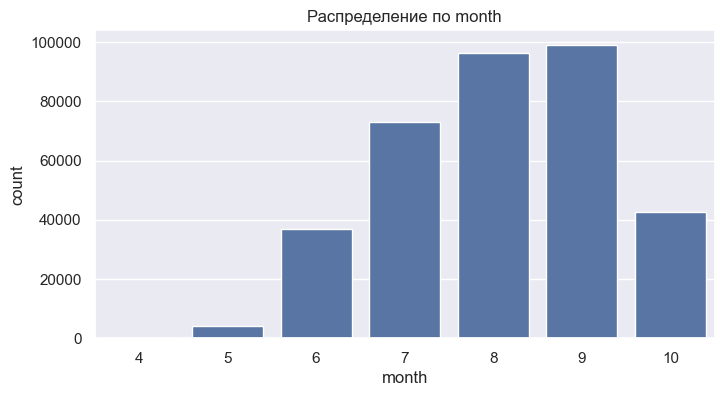

In [17]:
date_col1 = ['hour', 'day_of_week', 'month']

for col in date_col1:
    plt.figure(figsize=(8, 4))
    sns.barplot(df[col].value_counts())
    plt.title(f'Распределение по {col}')
    plt.show()

In [18]:
date_col2 = ['hour', 'dow_name', 'month_name']

for col in date_col2:
    agg = df.groupby(by=col, observed=True).agg(
        rides=('order_rk', 'count'),
        avg_price=('nominal_price_rub_amt', 'mean'),
        avg_distance=('distance_km', 'mean'),
        avg_duration=('trip_duration_min', 'mean'),
        avg_revenue=('nominal_price_rub_amt', 'sum')
    ).sort_values('rides', ascending=False)

    display(agg.style.format({'avg_revenue': '{:,.0f}'}))

,rides,avg_price,avg_distance,avg_duration,avg_revenue
hour,,,,,
15,31025,139.211090,2.656089,12.320545,"4,319,024"
16,28727,137.873123,2.527686,12.100347,"3,960,681"
14,25771,137.872375,2.634769,12.414687,"3,553,109"
17,23777,137.960587,2.566597,12.321604,"3,280,289"
5,22840,107.368988,2.245821,9.044514,"2,452,308"
18,20135,137.307281,2.578654,12.402024,"2,764,682"
13,19695,140.212585,2.602677,12.646649,"2,761,487"
6,18294,109.942009,2.206008,9.296765,"2,011,279"
12,17043,134.734009,2.586741,12.716013,"2,296,272"


,rides,avg_price,avg_distance,avg_duration,avg_revenue
dow_name,,,,,
Friday,55561,127.766319,2.494091,11.466022,"7,098,824"
Thursday,53292,124.817207,2.413227,11.098522,"6,651,758"
Wednesday,52827,126.005363,2.424045,11.204279,"6,656,486"
Tuesday,51077,126.131866,2.470425,11.282983,"6,442,438"
Monday,48952,124.393578,2.433524,11.131145,"6,089,314"
Saturday,48001,141.864700,2.645782,12.927078,"6,809,648"
Sunday,42572,142.495224,2.660301,13.032323,"6,066,307"


,rides,avg_price,avg_distance,avg_duration,avg_revenue
month_name,,,,,
September,99053,133.255020,2.781336,11.374896,"13,199,310"
August,96232,132.759903,2.764752,12.175115,"12,775,751"
July,72990,127.381721,2.349909,11.957554,"9,297,592"
October,42739,123.683571,1.847736,9.785219,"5,286,112"
June,36949,125.470215,2.146923,12.693065,"4,635,999"
May,4274,143.981766,2.189692,13.622030,"615,378"
April,45,102.947113,1.428238,8.219693,"4,633"


In [19]:
agg_h_d = df.groupby(by=['day_of_week', 'hour'], observed=True).agg(
        rides=('order_rk', 'count'),
        avg_price=('nominal_price_rub_amt', 'mean'),
        avg_distance=('distance_km', 'mean'),
        avg_duration=('trip_duration_min', 'mean'),
        avg_revenue=('nominal_price_rub_amt', 'sum')
).reset_index()

agg_h_d

,day_of_week,hour,rides,avg_price,avg_distance,avg_duration,avg_revenue
0,0,0,226,154.074,3.078,15.220,34820.828
1,0,1,185,120.806,2.307,10.930,22349.051
2,0,2,286,119.067,2.311,9.934,34053.121
3,0,3,843,104.294,2.077,8.054,87919.906
4,0,4,2351,101.408,2.109,8.332,238410.594
...,...,...,...,...,...,...,...
163,6,19,2315,135.410,2.576,12.256,313473.125
164,6,20,1652,135.757,2.626,12.549,224270.562
165,6,21,1138,134.598,2.666,12.621,153172.375
166,6,22,560,151.858,3.127,15.286,85040.500


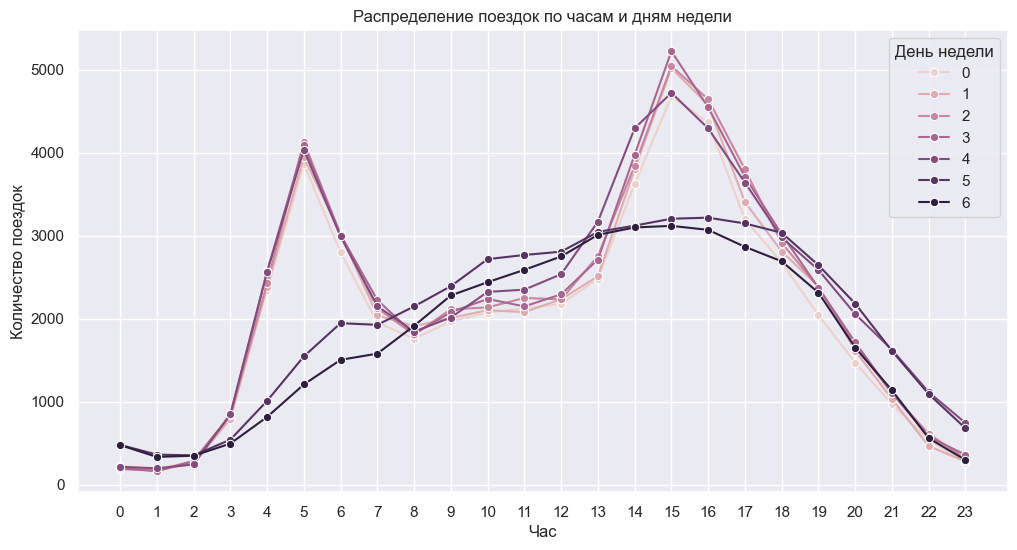

In [20]:
# распределение поездок по часам и дням недели

plt.figure(figsize=(12,6))
sns.lineplot(data=agg_h_d, x='hour', y='rides', hue='day_of_week', marker='o')
plt.title('Распределение поездок по часам и дням недели')
plt.xlabel('Час')
plt.ylabel('Количество поездок')
plt.xticks(range(0,24))
plt.legend(title='День недели')
plt.show()

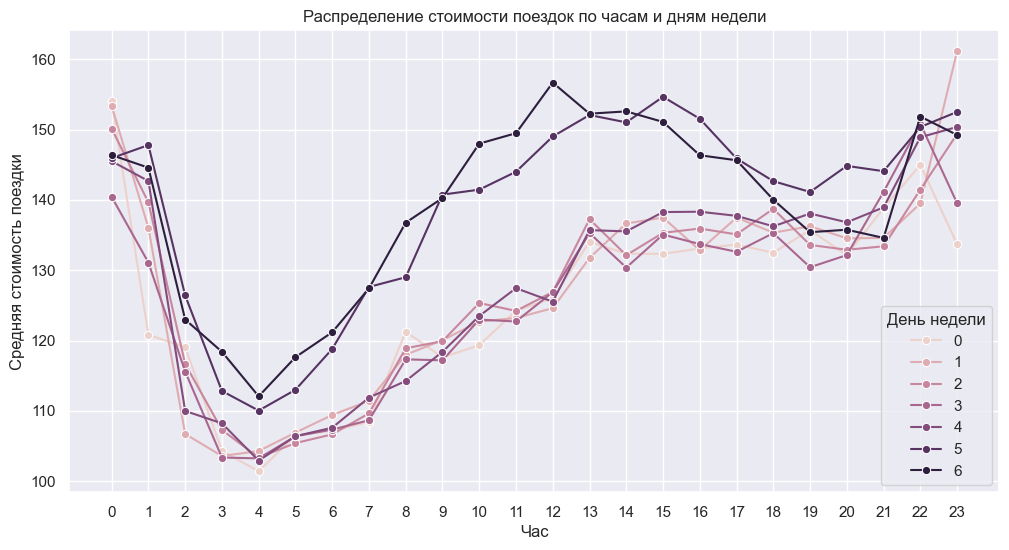

In [21]:
# распределение стоимости поездок по часам и дням недели

plt.figure(figsize=(12,6))
sns.lineplot(data=agg_h_d, x='hour', y='avg_price', hue='day_of_week', marker='o')
plt.title('Распределение стоимости поездок по часам и дням недели')
plt.xlabel('Час')
plt.ylabel('Средняя стоимость поездки')
plt.xticks(range(0,24))
plt.legend(title='День недели')
plt.show()

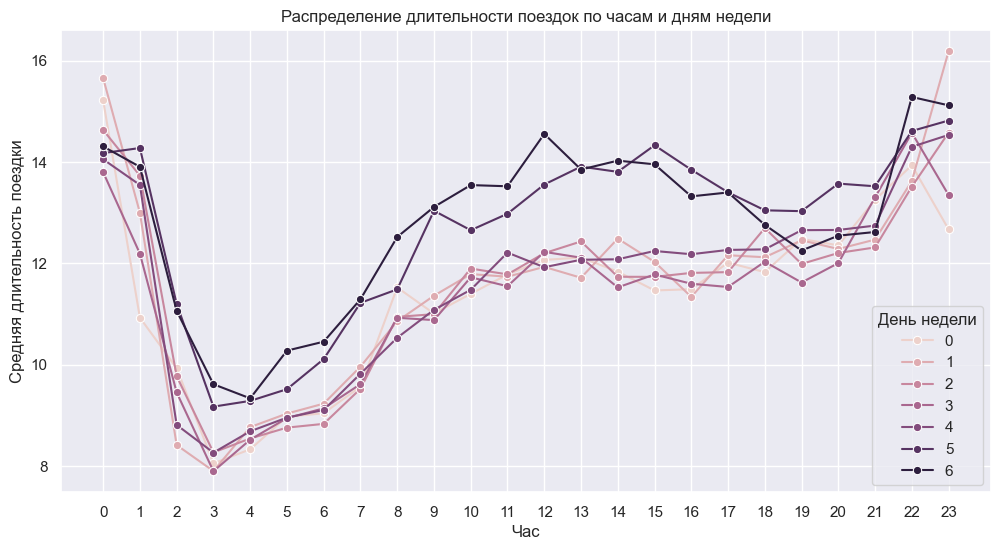

In [22]:
# распределение длительности поездок по часам и дням недели

plt.figure(figsize=(12,6))
sns.lineplot(data=agg_h_d, x='hour', y='avg_duration', hue='day_of_week', marker='o')
plt.title('Распределение длительности поездок по часам и дням недели')
plt.xlabel('Час')
plt.ylabel('Средняя длительность поездки')
plt.xticks(range(0,24))
plt.legend(title='День недели')
plt.show()

**Анализ временных признаков:**

Важно учесть следующий фактор: "Данные охватывают период с 2024-04-07 14:57:01 по 2024-10-21 17:18:07".

1. _Распределение по часам:_
    - Наблюдается пик поездок в дневное время с **14:00 до 18:00**, который сохраняется каждый день.
    - Также выделяется всплеск в промежутке между **5 и 6 часами утра в будние дни**.
2. _Распределение по дням недели:_
    - Активность постепенно растёт с понедельника, достигая **пика в пятницу**. В выходные наблюдается снижение количества поездок.
3. _Распределение по месяцам:_
    - Анализ показывает ярко выраженную сезонность использования сервиса. Существенный рост количества поездок начинается в июне, достигает **пика в августе-сентябре** и постепенно снижается к октябрю.
    - Отдельно стоит отметить низкие значения в апреле и мае. Согласно официальной информации, опубликованной Т-Банком 4 июня 2024 года, запуск сервиса "Самокаты" происходил в тестовом режиме, а первым партнёром стала компания Юрент. Это объясняет ограниченное количество поездок в апреле-мае.
4. _Распределение по длительности поездок:_
    - В выходные дни поездки дольше.

**Вывод:** при планировании логистики и маркетинговых активностей важно учитывать сезонные колебания — усиливать промо в периоды естественного спада и повышать готовность инфраструктуры в периоды пиков.

### Распределение категориальных признаков

Проверим, в каких городах чаще всего пользуются самокатами с 5 до 6 утра.

In [23]:
df[['lvn_state_nm', 'hour']].query('hour == 5').value_counts().head()

lvn_state_nm       hour
Г МОСКВА           5       5888
Г САНКТ-ПЕТЕРБУРГ  5       2735
МОСКОВСКАЯ ОБЛ     5       2476
СВЕРДЛОВСКАЯ ОБЛ   5       2023
Unknown            5       1801
Name: count, dtype: int64

Скорее всего, утренний всплеск поездок связан с необходимостью добраться на работу или учёбу в крупных городах (в основном, в будние дни).

In [24]:
print(f"Количество уникальных регионов: {df.lvn_state_nm.nunique()}")

Количество уникальных регионов: 205


In [25]:
# топ-10 регионов по количеству поездок
df['lvn_state_nm'].value_counts().reset_index().head(10)

,lvn_state_nm,count
0,Г МОСКВА,81409
1,МОСКОВСКАЯ ОБЛ,35666
2,Г САНКТ-ПЕТЕРБУРГ,34127
3,Unknown,30545
4,СВЕРДЛОВСКАЯ ОБЛ,25879
5,КРАСНОДАРСКИЙ КРАЙ,14442
6,РЕСП ТАТАРСТАН,8670
7,РЕСП БАШКОРТОСТАН,7441
8,НИЖЕГОРОДСКАЯ ОБЛ,6700
9,НОВОСИБИРСКАЯ ОБЛ,6106


Активнее всего сервис используется в Москве и МО, в Санкт-Петербурге, в Свердловской области и в Краснодарском крае.

In [26]:
print(f"Доля Москвы и МО от всех поездок: {round(len(df.query("(lvn_state_nm == 'Г МОСКВА') | (lvn_state_nm == 'МОСКОВСКАЯ ОБЛ')")) / len(df) * 100, 2)}%")
print(f"Доля прибыли Москвы и МО: {round(df.query("(lvn_state_nm == 'Г МОСКВА') | (lvn_state_nm == 'МОСКОВСКАЯ ОБЛ')")['nominal_price_rub_amt'].sum() / df['nominal_price_rub_amt'].sum(), 2) * 100}%")

Доля Москвы и МО от всех поездок: 33.23%
Доля прибыли Москвы и МО: 34.0%


Поездки в Москве и Московской области занимают треть всех поездок и приносят треть выручки.

`lvn_state_nm` — регион проживания клиента, что является информацией о клиенте. Посмотрим на распределение клиентов по регионам:

In [27]:
user_df['lvn_state_nm'].value_counts()

lvn_state_nm
Г МОСКВА                 10699
Unknown                   5514
МОСКОВСКАЯ ОБЛ            5398
Г САНКТ-ПЕТЕРБУРГ         5029
СВЕРДЛОВСКАЯ ОБЛ          2962
                         ...  
Г САМАРА                     0
ВОЛГОГРАДСКАЯ ОБЛАСТЬ        0
ОБЛАСТЬ ВОЛГОГРАДСКАЯ        0
ОБЛАСТЬ ЛЕНИНГРАДСКАЯ        0
СВЕРДЛОВСКАЯ                 0
Name: count, Length: 213, dtype: int64

In [28]:
user_df.groupby(by='lvn_state_nm', observed=True).agg(users=('party_rk', 'count')).sort_values(by='users', ascending=False).head(10)

,users
lvn_state_nm,
Г МОСКВА,10699
Unknown,5514
МОСКОВСКАЯ ОБЛ,5398
Г САНКТ-ПЕТЕРБУРГ,5029
СВЕРДЛОВСКАЯ ОБЛ,2962
КРАСНОДАРСКИЙ КРАЙ,1972
РЕСП ТАТАРСТАН,1608
РЕСП БАШКОРТОСТАН,1411
НИЖЕГОРОДСКАЯ ОБЛ,1306


Распределение моделей самокатов по поездкам.

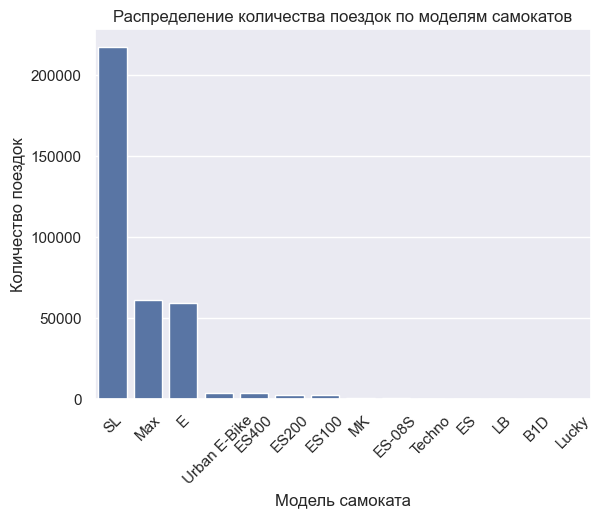

transport_model
SL              217135
Max              61050
E                59440
Urban E-Bike      3874
ES400             3602
ES200             2802
ES100             2368
MK                 926
ES-08S             705
Techno             195
ES                  91
LB                  71
B1D                 23
Lucky                0
Name: count, dtype: int64


In [29]:
sns.countplot(data=df, x='transport_model', order=df['transport_model'].value_counts().index)
plt.title("Распределение количества поездок по моделям самокатов")
plt.xlabel("Модель самоката")
plt.xticks(rotation=45)
plt.ylabel("Количество поездок")
plt.show()
print(df['transport_model'].value_counts())

Популярные модели самокатов:
- SL;
- Max;
- E.

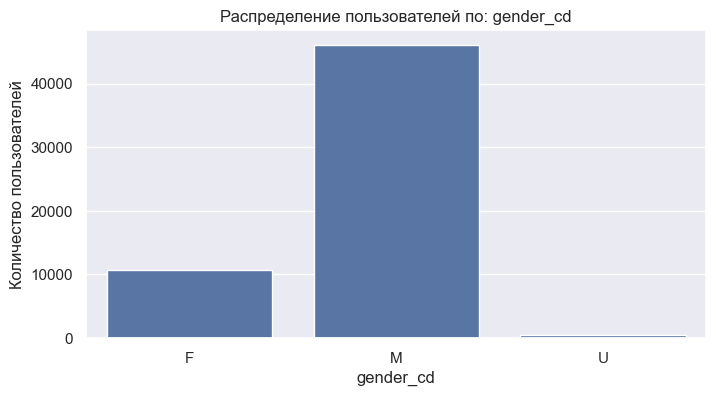

gender_cd
M    46117
F    10622
U      431
Name: count, dtype: int64


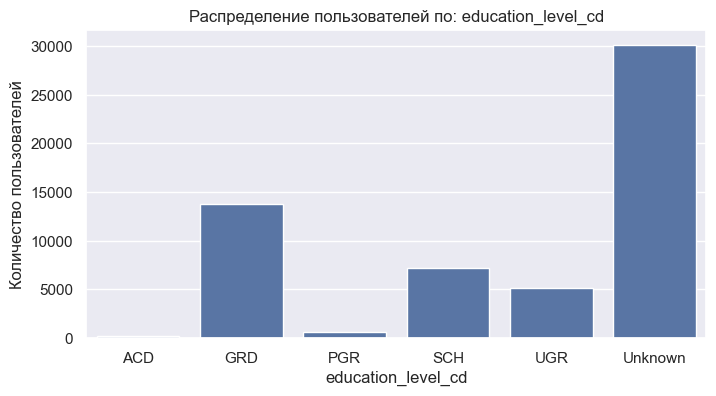

education_level_cd
Unknown    30159
GRD        13740
SCH         7243
UGR         5161
PGR          659
ACD          208
Name: count, dtype: int64


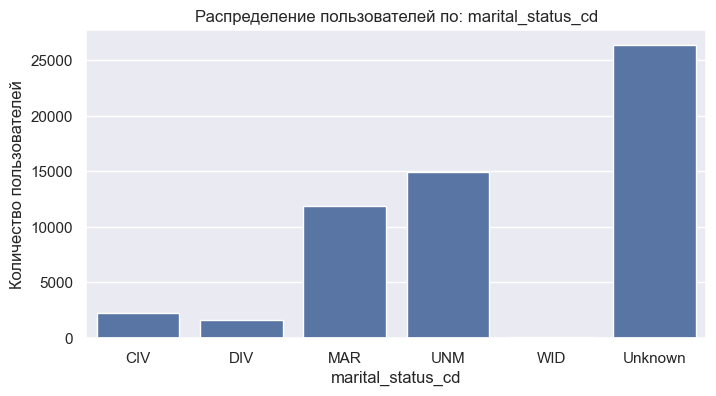

marital_status_cd
Unknown    26390
UNM        14911
MAR        11846
CIV         2282
DIV         1630
WID          111
Name: count, dtype: int64


In [30]:
category_columns = ['gender_cd', 'education_level_cd', 'marital_status_cd']

for col in category_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=user_df, x=col)
    plt.title(f"Распределение пользователей по: {col}")
    plt.xlabel(col)
    plt.ylabel("Количество пользователей")
    plt.show()
    print(user_df[col].value_counts())

**Анализ:**

- Мужчины составляют около **80%** пользователей.
- У многих клиентов неизвестны следующие признаки: уровень образования и семейное положение.

In [31]:
# метрики для каждого пола

df.groupby(by='gender_cd', observed=True).agg(
                        rides=('order_rk','count'),
                        avg_price=('nominal_price_rub_amt','mean'),
                        avg_distance=('distance_km','mean'),
                        avg_trip_duration_min=('trip_duration_min','mean')
).sort_values('rides', ascending=False)

,rides,avg_price,avg_distance,avg_trip_duration_min
gender_cd,,,,
M,297850,128.132,2.499,11.459
F,51827,141.617,2.537,13.082
U,2605,119.431,1.891,9.941


По распределению видно, что:
- поездок мужчинами сделано значительно больше, чем женщинами (обусловлено количеством пользователей);
- средняя стоимость поездки у женщин выше при примерно одинаковой дистанции — **141.62₽** против **128.13₽** у мужчин.

Наблюдается различие в стоимости поездок между мужчинами и женщинами. Однако для подтверждения этого требуется статистическая проверка.

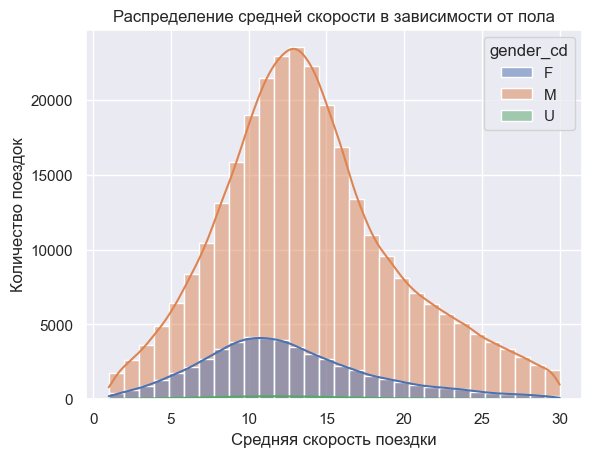

avg_speed_kmh        
                   mean  median
gender_cd                      
F                12.562  11.819
M                13.957  13.349
U                12.633  12.017

In [32]:
# распределение средней скорости по полу

sns.histplot(data=df, x='avg_speed_kmh', hue='gender_cd', bins=30, kde=True, color='blue')
plt.title("Распределение средней скорости в зависимости от пола")
plt.xlabel("Средняя скорость поездки")
plt.ylabel("Количество поездок")
plt.show()

df.groupby(by='gender_cd', observed=True).agg({'avg_speed_kmh': ['mean', 'median']})

Разная средняя и медианная скорость у мужчин и женщин — очень важный инсайт для объяснения различий в средней стоимости и длительности поездок.

In [33]:
gen_agg = df.groupby(by='gender_cd', observed=True).agg(
    users=('party_rk', 'nunique'),
    rides=('order_rk', 'count')
)
gen_agg

,users,rides
gender_cd,,
F,10622,51827
M,46117,297850
U,431,2605


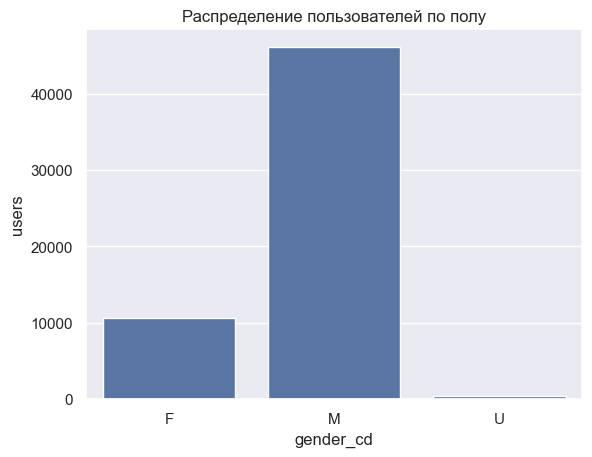

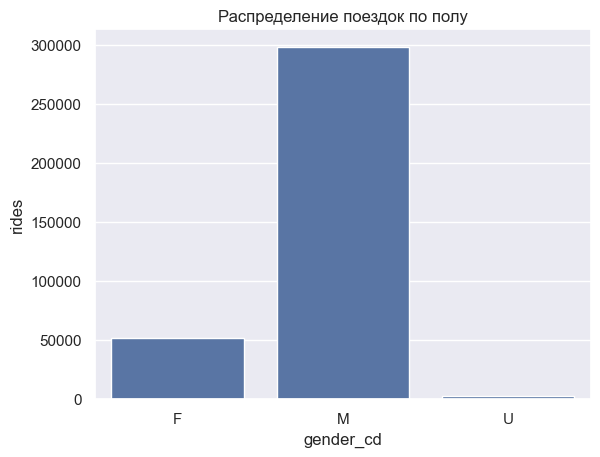

In [34]:
sns.barplot(data=gen_agg['users'])
plt.title('Распределение пользователей по полу')
plt.show()

sns.barplot(data=gen_agg['rides'])
plt.title('Распределение поездок по полу')
plt.show()

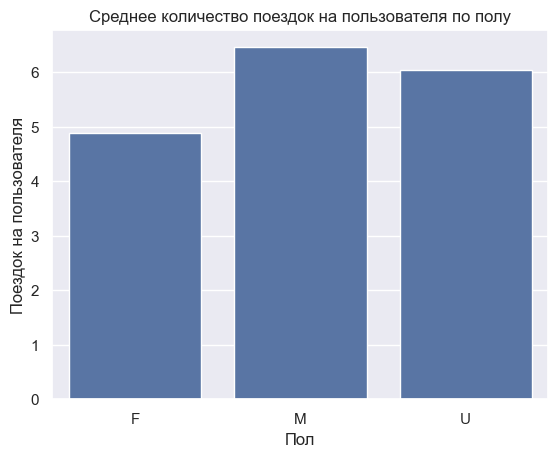

In [35]:
rides_per_user = gen_agg['rides'] / gen_agg['users']
sns.barplot(x=rides_per_user.index, y=rides_per_user.values)
plt.title('Среднее количество поездок на пользователя по полу')
plt.xlabel('Пол')
plt.ylabel('Поездок на пользователя')
plt.xticks(rotation=0)
plt.show()

In [36]:
print(f"Количество поездок на мужчину: {rides_per_user['M']}")
print(f"Количество поездок на женщину: {rides_per_user['F']}")

Количество поездок на мужчину: 6.458572760587202
Количество поездок на женщину: 4.879212954245904


In [37]:
print(f"Мужчины в среднем совершают на {round(rides_per_user['M']/rides_per_user['F'] * 100 - 100, 2)}% больше поездок на пользователя, чем женщины.")

Мужчины в среднем совершают на 32.37% больше поездок на пользователя, чем женщины.


Наблюдается различие в количестве поездок на пользователя между мужчинами и женщинами.

**Анализ категориальных признаков:**
- Большинство пользователей — мужчины (около 80%).
- Наибольшая активность приходится на крупные города, где есть инфраструктура для аренды самокатов и проживает большая часть клиентов.
- Стоимость поездки при примерно одинаковой дистанции у женщин выше, чем у мужчин.
- Мужчины совершают больше поездок на пользователя, чем женщины.

**Вывод:** основная аудитория сервиса — молодые мужчины с активным образом жизни, проживающие в городах-миллионниках.

### Формулировка гипотез

На основе EDA можно выдвинуть следующие гипотезы:

_H1 — Средняя стоимость поездки у женщин выше._

_H2 — В выходные дни поездки дольше, чем в будние дни._

_H3 — Средняя длительность поездки различается между мужчинами и женщинами._

_H4 — Поездки в выходные дни дороже, чем в будние._

_H5 — Активность пользователей (количество поездок) различается в будние и выходные дни: в будние дни наблюдается утренний пик поездок (5–6 утра), тогда как в выходные утренний пик отсутствует, при этом во все дни есть дневной пик (14–18 часов)._

_H6 — Наблюдается различие в количестве поездок на пользователя между мужчинами и женщинами._

### Выводы по исследовательскому анализу данных

- Активные пользователи сервиса — это **мужчины 18-40 лет**, проживающие в крупных городах. В среднем они совершают **на 32% больше** поездок на пользователя, чем женщины.
- Активность пользователей растёт от понедельника к пятнице, достигая пика в пятницу. В выходные наблюдается снижение количества поездок.
- В будние дни наблюдается утренний **пик поездок с 5 до 6 утра**, тогда как в выходные утренний пик отсутствует, при этом во все дни активность растёт к послеобеденному времени и достигает **пика с 14 до 18 часов**.
- Сезонность ярко выражена: максимальное количество поездок в **августе-сентябре**, спад начинается в октябре.
- Основные метрики (скорость, дистанция, время, стоимость) распределены логично, сильная **корреляция** между расстоянием, временем и стоимостью.
- Выявленные зависимости позволяют сформулировать гипотезы о различиях в поведении пользователей и ценовых паттернах, которые будут проверены статистически.